Code to generate fig. 2A,B,D

In [2]:
%matplotlib inline
import os, glob, warnings, sys
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

import numpy as np
import pandas as pd
import scipy
from scipy import stats as ss
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
import seaborn as sns

from scipy.optimize import least_squares
from scipy.io import loadmat

sys.path.append('/project/3014018.02/analysis_mri/DataSharingCollection'+
                '/Code/1.Behavior-FitModels/Functions/')
import choiceModels, costFunctions, penalizedModelFit

base_dir = '/project/3014018.02/analysis_mri/DataSharingCollection/'

## Plot sub behavior

In [3]:
def plot_sub(subDat):
    fig = sns.relplot('Investment','Returned',data=subDat,style='Multiplier',
                height = 2.5, color='k', s=60, style_order=[6,4,2],legend=False)

    for mult in [2,4,6]:
        x_dat = subDat.loc[subDat['Multiplier']==mult,'Investment']
        y_dat = subDat.loc[subDat['Multiplier']==mult,'Returned']
        lm = scipy.stats.linregress(x_dat,y_dat)
        plt.plot([0,10],[lm.intercept,lm.intercept+10*lm.slope],'k:')
    plt.ylim([-1,31])
    plt.xticks(np.arange(0,11,2))
    plt.yticks(np.arange(0,31,5))
    return fig

In [4]:
def plot_sub_ax(subDat,subNum,ax):
    markers = ['^','o','v']
    handles = list()
    for multInd,mult in enumerate([6,4,2]):
        x_dat = subDat.loc[subDat['Multiplier']==mult,'Investment']
        y_dat = subDat.loc[subDat['Multiplier']==mult,'Returned']
        handle = ax.scatter(x_dat,y_dat,c='k',marker=markers[multInd],
                            s=50,alpha=.6)
        handles.append(handle)
        lm = scipy.stats.linregress(x_dat,y_dat)
        ax.plot([0,10],[lm.intercept,lm.intercept+10*lm.slope],'k:')
    ax.set_ylim([-1,31])
    ax.set_xticks(np.arange(0,11,2))
    ax.set_yticks(np.arange(0,31,5))
    ax.legend(handles,['x6','x4','x2'],loc=2,frameon=False)
    ax.set_xlabel('Investment')
    ax.set_ylabel('Returned')
    ax.set_title('Subject %i'%subNum)

In [5]:
allDat = pd.read_csv(os.path.join(base_dir,'Data/1.TaskBehavior/allDataLong.csv'),header=None)
allDat.columns = ['sub','Investment','Multiplier','Returned','soe','fair','soc1','soc2']
allDat.head()

,sub,Investment,Multiplier,Returned,soe,fair,soc1,soc2
0,122,3,4,2,2,2.0,3.0,2.0
1,122,10,4,24,20,20.0,20.0,20.0
2,122,3,4,2,2,2.0,3.0,2.0
3,122,2,4,0,0,0.0,0.0,0.0
4,122,6,2,8,10,4.0,4.0,4.0


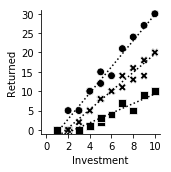

In [6]:
sub = 143
subDat = allDat.loc[allDat['sub']==sub,:]
subDat = subDat.loc[subDat['Investment']>0,:].copy().reset_index(drop=True)
subDat.head()
plot_sub(subDat);

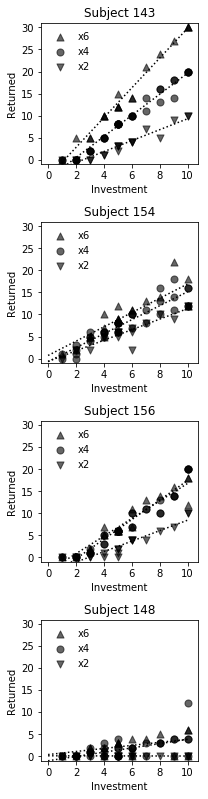

In [7]:
subjects = [143,154,156,148]

fig,ax = plt.subplots(nrows=len(subjects),ncols=1,figsize=[3,2.8*len(subjects)])
for subInd,sub in enumerate(subjects):
    subDat = allDat.loc[allDat['sub']==sub,:]
    subDat = subDat.loc[subDat['Investment']>0,:].copy().reset_index(drop=True)
    plot_sub_ax(subDat,sub,ax[subInd])
plt.tight_layout()

## Plot model per subject

In [8]:
def plot_model_ax(modelDat,theta,phi,ax):
    markers = ['^','o','v']
    handles = list()
    for multInd,mult in enumerate([6,4,2]):
        x_dat = modelDat.loc[subDat['Multiplier']==mult,'Investment']
        y_dat = modelDat.loc[subDat['Multiplier']==mult,'Returned']
        handle = ax.scatter(x_dat,y_dat,c='k',marker=markers[multInd],
                            s=50,alpha=.6)
        handles.append(handle)
        lm = scipy.stats.linregress(x_dat,y_dat)
        ax.plot([0,10],[lm.intercept,lm.intercept+10*lm.slope],'k:')
    ax.set_ylim([-1,31])
    ax.set_xticks(np.arange(0,11,2))
    ax.set_yticks(np.arange(0,31,5))
    ax.legend(handles,['x6','x4','x2'],loc=2,frameon=False)
    ax.set_xlabel('Investment')
    ax.set_ylabel('Returned')
    ax.set_title('th = %.2f, ph = %.2f'%(theta,phi))

In [9]:
fittedParams = pd.read_csv(os.path.join(base_dir,
                        'Results/1.Behavior-FitModels/First_bests_all.csv'),
                          index_col=0)
fittedParams = (fittedParams.loc[fittedParams['model']=='MP_ppSOE',['sub','theta','phi']]
                .copy().reset_index(drop=True))
fittedParams.head()

,sub,theta,phi
0,124,0.340718,0.055082
1,126,0.078473,0.000799
2,128,0.030199,0.059205
3,129,0.206195,-0.095803
4,130,0.078536,-0.017041


In [10]:
sub = 143
theta,phi = fittedParams.loc[fittedParams['sub']==sub,['theta','phi']].values[0]
subDat = allDat.loc[allDat['sub']==sub,:]
subDat = subDat.loc[subDat['Investment']>0,:].copy().reset_index(drop=True)
print(sub,theta,phi)

(143, 0.006542911109500671, 0.09411074824025012)


In [11]:
modelDat = subDat.copy()
for trial in range(len(modelDat)):
    inv = modelDat.iloc[trial]['Investment']
    mult = modelDat.iloc[trial]['Multiplier']
    modelDat.loc[trial,'Returned'] = choiceModels.MP_model_ppSOE(inv,mult,999,0.02,0)
modelDat.head()

,sub,Investment,Multiplier,Returned,soe,fair,soc1,soc2
0,143,8,2,6.0,14,7.0,7.0,7.0
1,143,4,6,10.0,5,9.0,9.0,9.0
2,143,6,4,10.0,8,10.0,10.0,10.0
3,143,2,4,0.0,0,0.0,0.0,0.0
4,143,4,2,1.0,5,1.0,1.0,1.0


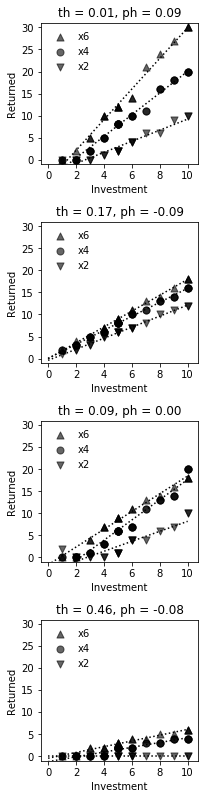

In [12]:
subjects = [143,154,156,148]

fig,ax = plt.subplots(nrows=len(subjects),ncols=1,figsize=[3,2.8*len(subjects)])
for subInd,sub in enumerate(subjects):
    subDat = allDat.loc[allDat['sub']==sub,:]
    subDat = subDat.loc[subDat['Investment']>0,:].copy().reset_index(drop=True)
    theta,phi = fittedParams.loc[fittedParams['sub']==sub,['theta','phi']].values[0]
    modelDat = subDat.copy()
    for trial in range(len(modelDat)):
        inv = modelDat.iloc[trial]['Investment']
        mult = modelDat.iloc[trial]['Multiplier']
        modelDat.loc[trial,'Returned'] = choiceModels.MP_model_ppSOE(inv,mult,999,theta,phi)
    plot_model_ax(modelDat,theta,phi,ax[subInd])
plt.tight_layout()

## Behavior and model side-by-side

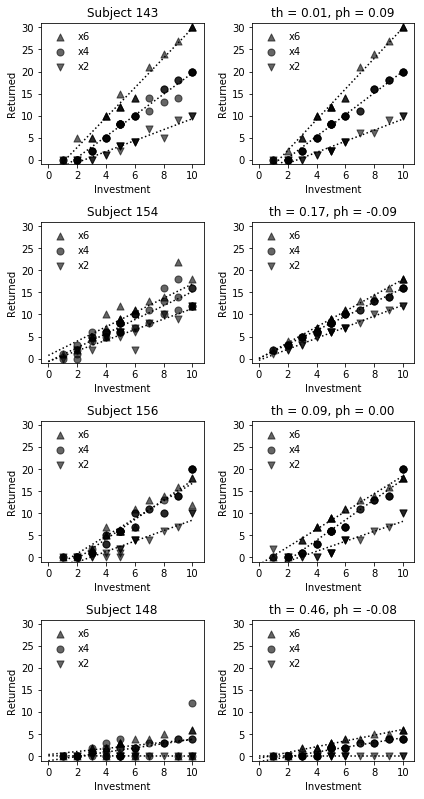

In [14]:
subjects = [143,154,156,148]

fig,ax = plt.subplots(nrows=len(subjects),ncols=2,figsize=[6,2.8*len(subjects)])
for subInd,sub in enumerate(subjects):
    subDat = allDat.loc[allDat['sub']==sub,:]
    subDat = subDat.loc[subDat['Investment']>0,:].copy().reset_index(drop=True)
    theta,phi = fittedParams.loc[fittedParams['sub']==sub,['theta','phi']].values[0]
    modelDat = subDat.copy()
    for trial in range(len(modelDat)):
        inv = modelDat.iloc[trial]['Investment']
        mult = modelDat.iloc[trial]['Multiplier']
        modelDat.loc[trial,'Returned'] = choiceModels.MP_model_ppSOE(inv,mult,999,theta,phi)
    plot_sub_ax(subDat,sub,ax[subInd,0])
    plot_model_ax(modelDat,theta,phi,ax[subInd,1])
plt.tight_layout()
plt.savefig(os.path.join(base_dir,'Results/1.Behavior-FitModels/ExampleSubjectsWithModel.pdf'),
            transparent=True,bbox_inches='tight')

## Model parameter space

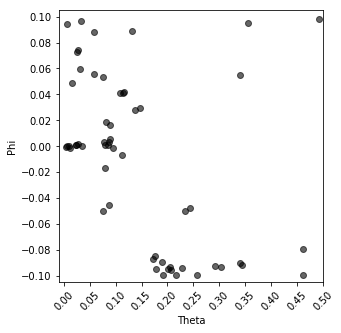

In [15]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(1,1,1,aspect=2.5)
ax.scatter(fittedParams['theta'],fittedParams['phi'],c='k',alpha=.6)
ax.set_xlim([-.01,.501])
ax.set_ylim([-.105,.105])
ax.set_xticks(np.arange(0,.501,.05));
ax.set_xticklabels(['%.2f'%x for x in np.arange(0,.501,.05)],rotation=45)
ax.set_yticks(np.arange(-.1,.101,.02));
ax.set_xlabel('Theta');
ax.set_ylabel('Phi');
plt.savefig(os.path.join(base_dir,'Results/1.Behavior-FitModels/ParameterSpace.pdf'),
            transparent=True,bbox_inches='tight')